<a href="https://colab.research.google.com/github/takam1602/zeroPython/blob/main/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from graphviz import Digraph

def kaidan(n):
  if n ==1:
    return 1
  if n ==2:
    return 2
  
  return kaidan(n-1)+kaidan(n-2)

In [4]:
kaidan(3)

3

In [5]:
kaidan(4)

5

In [6]:
kaidan(5)

8

In [7]:
kaidan(10)

89

In [8]:
def kaidan_g(n,g,nodes,parent=None):
  index = str(len(nodes))
  nodes.append(index)
  g.node(index,str(n))

  if parent is not None:
    g.edge(index,parent)
  
  if n in (1,2):
    return 

  kaidan_g(n-1,g,nodes,index)
  kaidan_g(n-2,g,nodes,index)

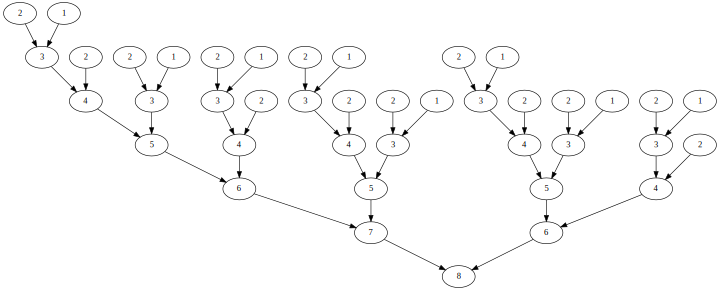

In [11]:
n = 8
graph = Digraph()
graph.attr(size = "10,10")
kaidan_g(n,graph,[])
graph


In [12]:
import pickle
import IPython
from PIL import Image,ImageDraw
from matplotlib import pyplot as plt

!wget https://kaityo256.github.io/python_zero/recursion/maze.pickle

--2021-04-13 14:55:11--  https://kaityo256.github.io/python_zero/recursion/maze.pickle
Resolving kaityo256.github.io (kaityo256.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to kaityo256.github.io (kaityo256.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1959 (1.9K) [application/octet-stream]
Saving to: ‘maze.pickle’

maze.pickle         100%[===================>]   1.91K  --.-KB/s    in 0s      

2021-04-13 14:55:11 (27.3 MB/s) - ‘maze.pickle’ saved [1959/1959]



In [13]:
def save_image(maze,filename = "test.png"):
  w = len(maze)
  h = len(maze[0])
  g = int(400/w)
  white = (255,255,255)
  im = Image.new("RGB",(w*g,h*g),white)
  draw = ImageDraw.Draw(im)
  for ix in range(w):
    for iy in range(h):
      x = ix*g
      y = iy * g
      s = maze[ix][iy]
      color = white
      if s == '*':
        color =(0,0,0)
      elif s == 'S':
        color = (0,0,255)
      elif s == 'G':
        color = (0,255,0)
      elif s == '+':
        color = (255,0,0)

      if isinstance(maze[ix][iy],int):
        color =(128,128,128)
      draw.rectangle((x,y,x+g,y+g),fill = color)
  
  im.save(filename)
  plt.imshow(Image.open(filename))

  

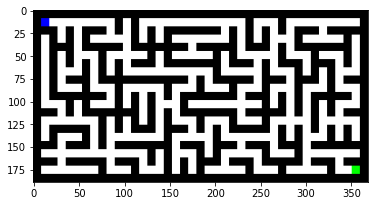

In [14]:
with open('maze.pickle','rb') as f:
  maze = pickle.load(f)
save_image(maze)

In [15]:
def solve(x,y,step,maze):
  if maze[x][y] == '*':
    return 
  if isinstance(maze[x][y],int):
    return 
  maze[x][y] = step
  solve(x+1,y,step+1,maze)
  solve(x,y+1,step+1,maze)
  solve(x-1,y,step+1,maze)
  solve(x,y-1,step+1,maze)

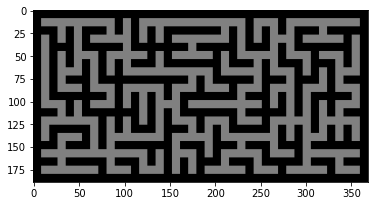

In [16]:
with open('maze.pickle','rb') as f:
  maze = pickle.load(f)
solve(1,1,0,maze)
save_image(maze)

In [17]:
def draw_path(x,y,count,maze):
  if not isinstance(maze[x][y],int):
    return 
  if maze[x][y] != count:
    return 
  maze[x][y] = '+'
  count -= 1
  draw_path(x+1,y,count,maze)
  draw_path(x,y+1,count,maze)
  draw_path(x-1,y,count,maze)
  draw_path(x,y-1,count,maze)

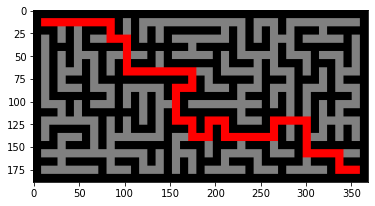

In [18]:
draw_path(39,19,maze[39][19],maze)
save_image(maze)

In [22]:
!pip install apng
from apng import APNG

def solve_anime(x,y,step,maze,files):
  if maze[x][y] == '*':
    return 
  if isinstance(maze[x][y],int):
    return 
  maze[x][y]  = step
  index = len(files)
  filename = "file%03d.png" % index
  save_image(maze,filename)
  files.append(filename)
  solve_anime(x+1,y,step+1,maze,files)
  solve_anime(x,y+1,step+1,maze,files)
  solve_anime(x-1,y,step+1,maze,files)
  solve_anime(x,y-1,step+1,maze,files)

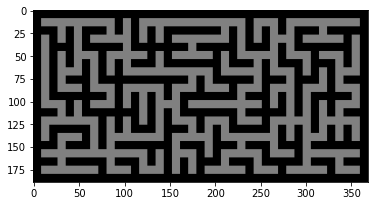

In [23]:
with open('maze.pickle','rb') as f:
  maze = pickle.load(f)
files = []
solve_anime(1,1,0,maze,files)

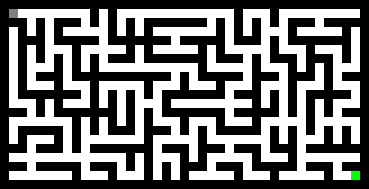

In [24]:
APNG.from_files(files,delay=50).save("animation.png")
IPython.display.Image("animation.png")

In [25]:
!wget https://kaityo256.github.io/python_zero/recursion/largemaze.pickle


--2021-04-13 14:58:30--  https://kaityo256.github.io/python_zero/recursion/largemaze.pickle
Resolving kaityo256.github.io (kaityo256.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to kaityo256.github.io (kaityo256.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7079 (6.9K) [application/octet-stream]
Saving to: ‘largemaze.pickle’

largemaze.pickle    100%[===================>]   6.91K  --.-KB/s    in 0s      

2021-04-13 14:58:30 (74.6 MB/s) - ‘largemaze.pickle’ saved [7079/7079]



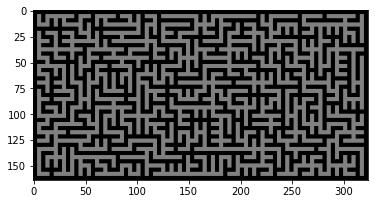

In [27]:
with open('largemaze.pickle','rb') as f:
  maze = pickle.load(f)
files = []
solve_anime(1,1,0,maze,files)

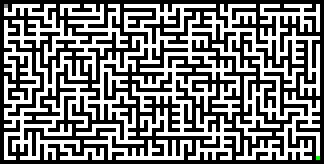

In [28]:
APNG.from_files(files,delay=50).save("animation.png")
IPython.display.Image("animation.png")